# RETAIL STORE SALES PREDICTION - CHUKWUJEKWU JOSEPH EZEMA

## Introduction
This is a capstone project by Careerera - for Postgraduate Diploma in Data Science submitted this day, 9th June 2023

#### Context
The Challenge - One challenge of modelling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.
#### Content
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.
Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales
#### Stores
Anonymized information about the 45 stores, indicating the type and size of store
#### Features
Contains additional data related to the store, department, and regional activity for the given dates.
- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. Markdown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- Is Holiday - whether the week is a special holiday week
#### Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
- Store - the store number
- Dept - the department number
- Date - the week
- Weekly Sales - sales for the given department in the given store
- Is Holiday - whether the week is a special holiday week
#### The Task
1.	Predict the department-wide sales for each store for the following year
2.	Model the effects of markdowns on holiday weeks
3.	Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact



## 1.0 LOAD DATASET

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Date libraries
from datetime import datetime

# Display all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#Confirmation
print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Load datasets

# Reading the Sales File 
sales = pd.read_csv('sales data-set.csv')

sales_copy = sales.copy() #making a copy
sales_copy

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [3]:
# Reading the Features File 
features = pd.read_csv('Features data set.csv')

features_copy = features.copy() #making a copy
features_copy

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
# Reading the Store File
stores = pd.read_csv('stores data-set.csv')

stores_copy = stores.copy() #making a copy
stores_copy

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## 2.0 EXPLORATORY DATA ANALYSIS (EDA)

### 2.1 Sales Data EDA

In [5]:
# Display the first 5 rows
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
# Print the shape of the data
sales.shape

(421570, 5)

In [7]:
# Check the data types and missing values in the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
# Convert the Date feature to datetime datatype
sales['Date'] = pd.to_datetime(sales['Date'])

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [10]:
# Check unique Store ID:
print("Number of unique Store IDs: {}".format(len(sales['Store'].unique())))

# Check duplicated records:
print("Number of duplicated records before dropping:",sales.duplicated().sum())

Number of unique Store IDs: 45
Number of duplicated records before dropping: 0


In [11]:
# Check for missing values
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
# Group 'Store' by count of unique 'Dept'
dept_per_store = sales.groupby('Store')['Dept'].nunique()

# Sort the number of departments per store in descending order
sorted_dept = dept_per_store.sort_values(ascending=False)

# Reset the index to convert the result into a DataFrame
reset_sorted_dept = sorted_dept.reset_index()

# Top 10 Stores by number of department
reset_sorted_dept.head(10)

,Store,Dept
0,19,79
1,15,79
2,13,79
3,20,78
4,18,78
5,2,78
6,11,78
7,27,78
8,34,78
9,4,78


In [13]:
# Group 'Store' by sum of 'Weekly_Sales'
sales_per_store = sales.groupby('Store')['Weekly_Sales'].sum()

# Sort the sum of sales per store in descending order
sorted_sales = sales_per_store.sort_values(ascending=False)

# Reset the index to convert the result into a DataFrame
reset_sorted_sales = sorted_sales.reset_index()

# Top 10 Stores by sum of weekly sales
reset_sorted_sales.head(10)

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [14]:
# Descriptive statistics for the numerical variables in the dataset except the key columns (Stores and Dept IDs)
sales[['Weekly_Sales']].describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


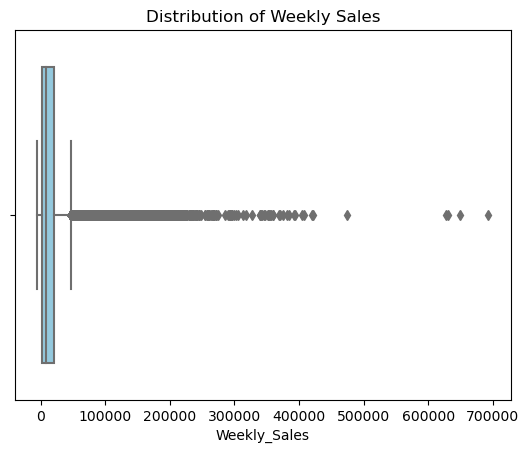

In [15]:
# VISUALIZE OBSERVATIONS

# Check for outliers through the Weekly_Sales
sns.boxplot(sales['Weekly_Sales'], color='skyblue')
plt.title('Distribution of Weekly Sales')
plt.show()

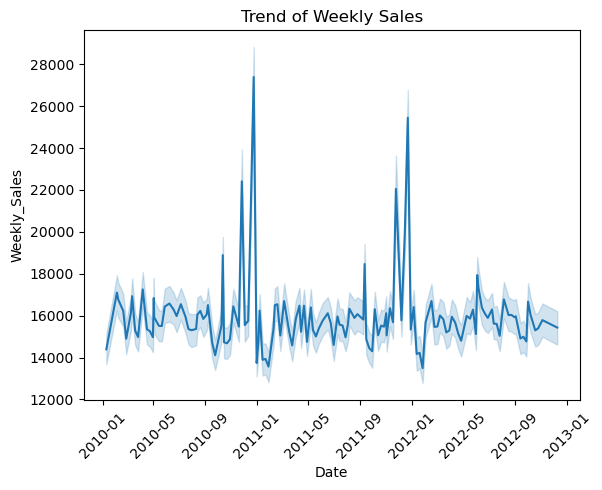

In [16]:
# Show the trend of Weekly_Sales
sns.lineplot(data=sales, x='Date', y='Weekly_Sales')
plt.title('Trend of Weekly Sales')
plt.xticks(rotation=45)
plt.show()

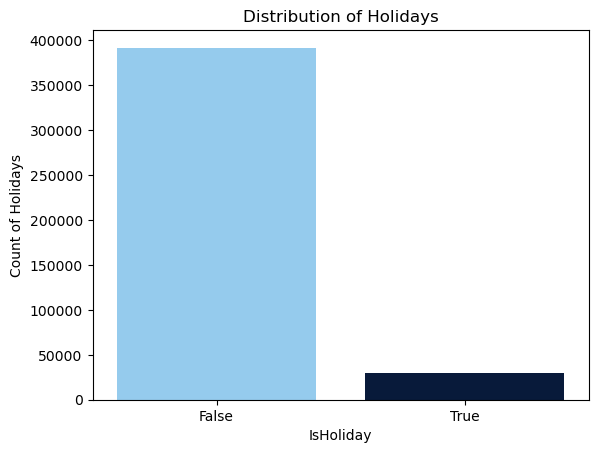

In [17]:
# Check the distribution of holidays
holiday_palette = {False: '#87CEFB', 
                   True: '#001842'}
sns.countplot(x="IsHoliday", data=sales, palette=holiday_palette)
plt.title('Distribution of Holidays')
plt.ylabel('Count of Holidays')
plt.show()

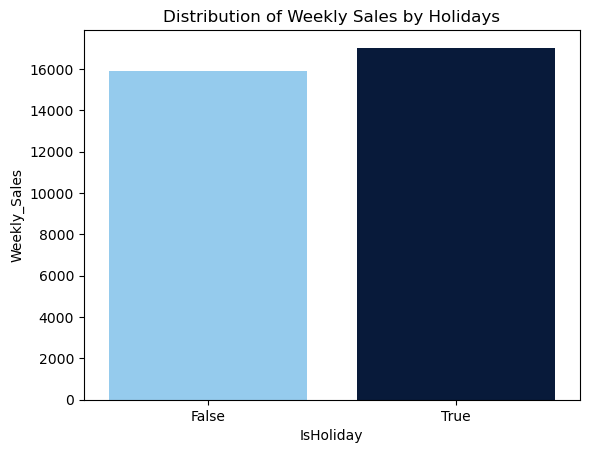

In [18]:
# Distribution of weekly sales by holidays
sns.barplot(x="IsHoliday",y="Weekly_Sales", data=sales, palette=holiday_palette, ci=None)
plt.title('Distribution of Weekly Sales by Holidays')
plt.show()

### 2.2 Features Data EDA

In [19]:
# The first 5 rows
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
# The shape of the data
features.shape

(8190, 12)

In [21]:
# Check the data types and missing values in the dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [22]:
# Convert the Date feature to datetime datatype
features['Date'] = pd.to_datetime(sales['Date'])

In [23]:
# Check duplicated records:
print("Number of duplicated records before dropping:",features.duplicated().sum())

Number of duplicated records before dropping: 0


In [24]:
# Check for missing values
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [25]:
# Descriptive Statistics for the numerical variables in the dataset (excluding the Store ID)
features.drop(columns='Store').describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


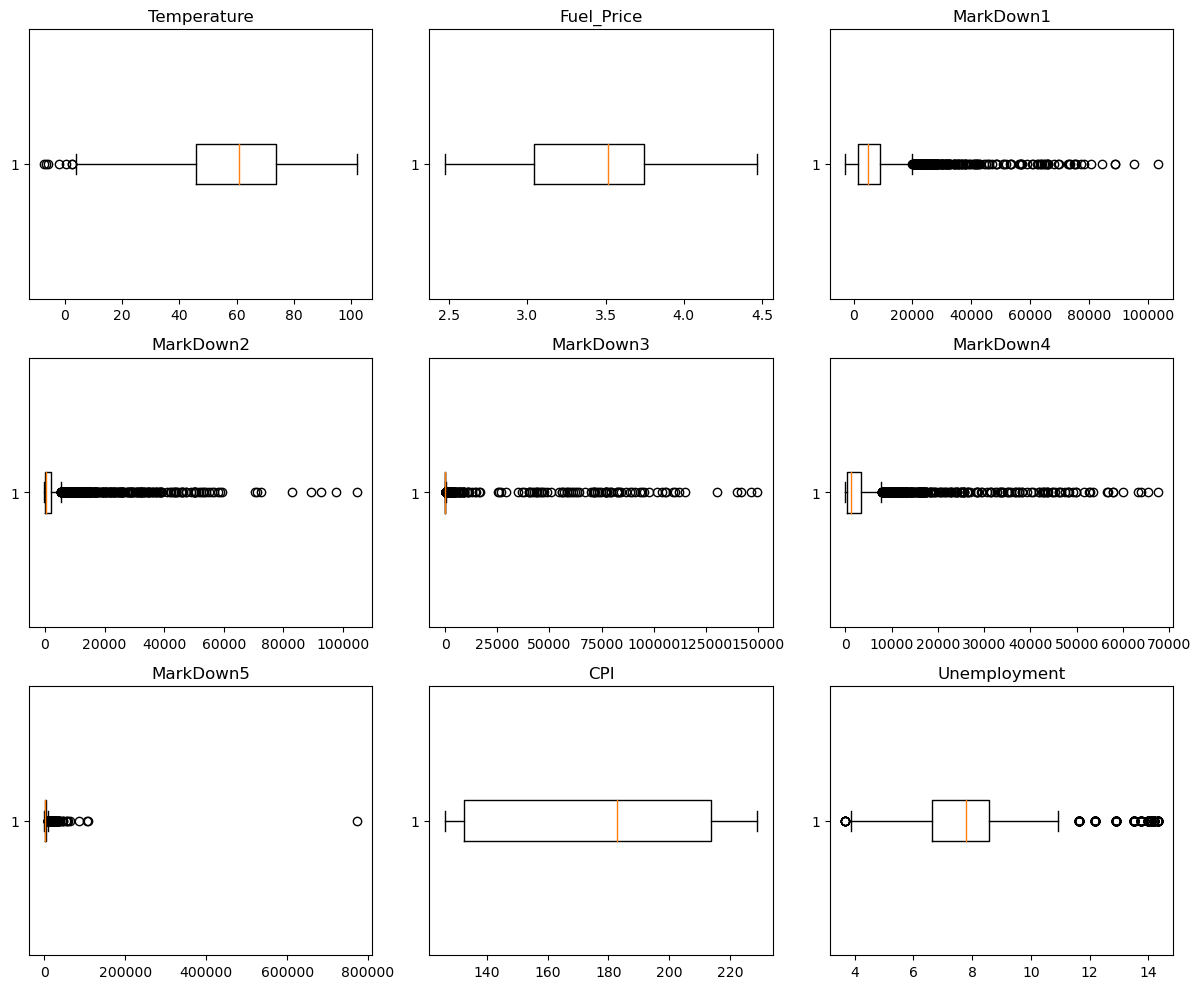

In [26]:
# VISUALIZE OBSERVATIONS

# Select only the numerical columns for plotting
numerical_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

# Create subplots with sub-axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    ax = axes[i]  # Get the current axis
    ax.boxplot(features[column].dropna(), vert=False)  # Plot the boxplot
    ax.set_title(column)  # Set the title

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

By visualizing the boxplots, we can get an idea of the distribution and identify if they follow a normal distribution or exhibit any outliers. This information can then help inform the choice of appropriate imputation methods for handling missing values in each column. In this case, all those columns (containing missing values) with outliers will be imputed with their respective median as it is believed to handle the skewness of outliers while those with normal distribution will be imputed with their respective mean. 

In [27]:
# Outlier columns with missing values
outliers = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unemployment']

# Fill missing values of the outliers with their respective median values inplace
features[outliers] = features[outliers].fillna(features[outliers].median())

# Fill missing values of the normal distribution (CPI) with mean values inplace
features['CPI'] = features['CPI'].fillna(features['CPI'].mean())

# Verify the updated data
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

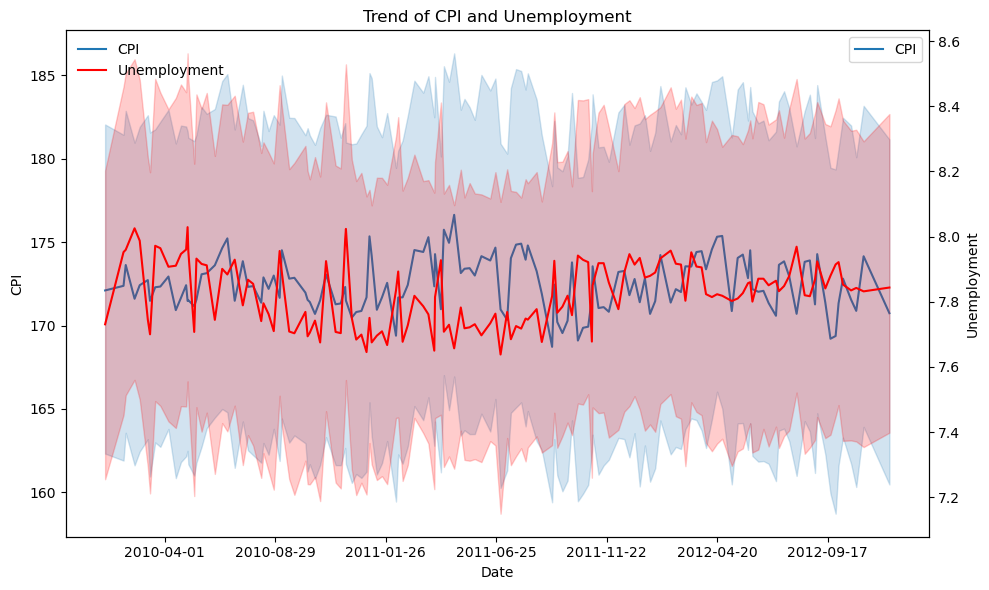

In [28]:
# Trend of Consumer Price Index and Unemployment

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot multiline series for CPI on the first y-axis
sns.lineplot(data=features, x='Date', y='CPI', ax=ax1, label='CPI')

# Plot Unemployment on the second y-axis
sns.lineplot(data=features, x='Date', y='Unemployment', ax=ax2, color='red', label='Unemployment')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI')
ax2.set_ylabel('Unemployment')
plt.title('Trend of CPI and Unemployment')

# Adjust legend location and layout
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Adjust x-axis tick rotation and frequency
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the step value (10) as needed

plt.tight_layout()
plt.show()

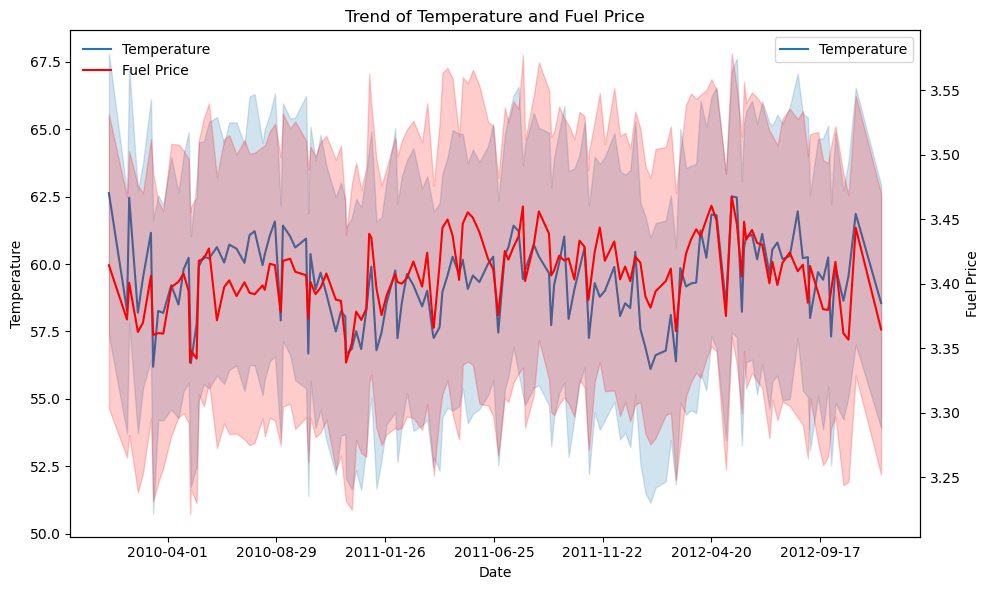

In [29]:
# Trend of Temperature and Fuel Price

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot multiline series for Temperature on the first y-axis
sns.lineplot(data=features, x='Date', y='Temperature', ax=ax1, label='Temperature')

# Plot Fuel_Price on the second y-axis
sns.lineplot(data=features, x='Date', y='Fuel_Price', ax=ax2, color='red', label='Fuel Price')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature')
ax2.set_ylabel('Fuel Price')
plt.title('Trend of Temperature and Fuel Price')

# Adjust legend location and layout
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Adjust x-axis tick rotation and frequency
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust the step value (10) as needed

plt.tight_layout()
plt.show()

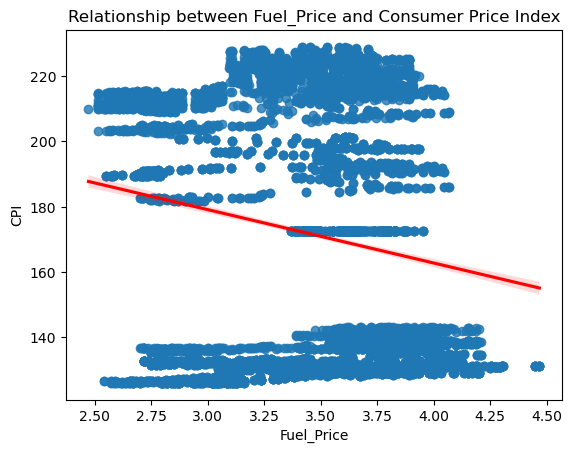

In [30]:
# Show the Relationship between Fuel_Price and Consumer Price Index

# Scatter plot with trend line
sns.regplot(data=features, x='Fuel_Price', y='CPI', line_kws={'color': 'red'})
plt.title('Relationship between Fuel_Price and Consumer Price Index')
plt.xlabel('Fuel_Price')
plt.ylabel('CPI')

plt.show()

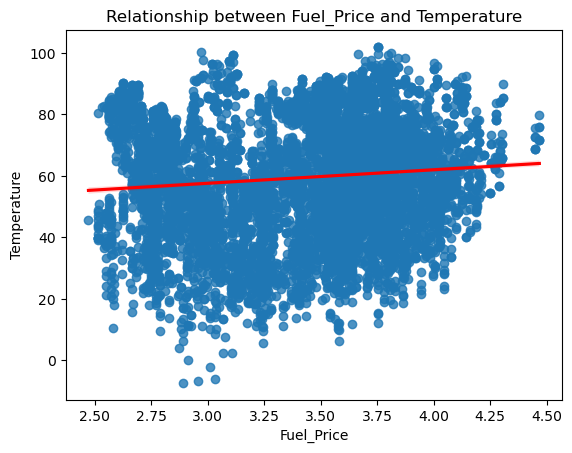

In [31]:
# Show the Relationship between Fuel_Price and Temperature

# Scatter plot with trend line
sns.regplot(data=features, x='Fuel_Price', y='Temperature', line_kws={'color': 'red'})
plt.title('Relationship between Fuel_Price and Temperature')
plt.xlabel('Fuel_Price')
plt.ylabel('Temperature')

plt.show()

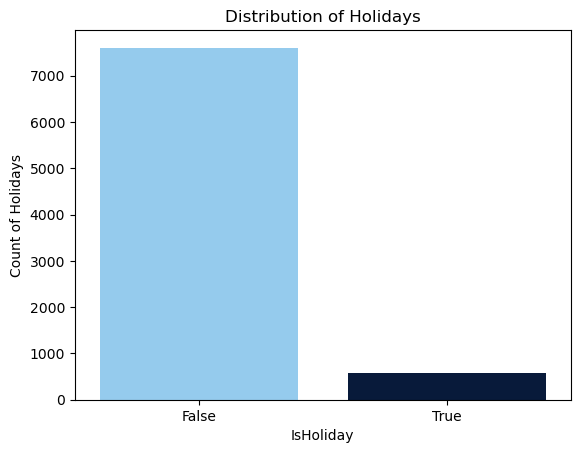

In [32]:
# Distribution of holidays
sns.countplot(x="IsHoliday", data=features, palette=holiday_palette)
plt.title('Distribution of Holidays')
plt.ylabel('Count of Holidays')
plt.show()

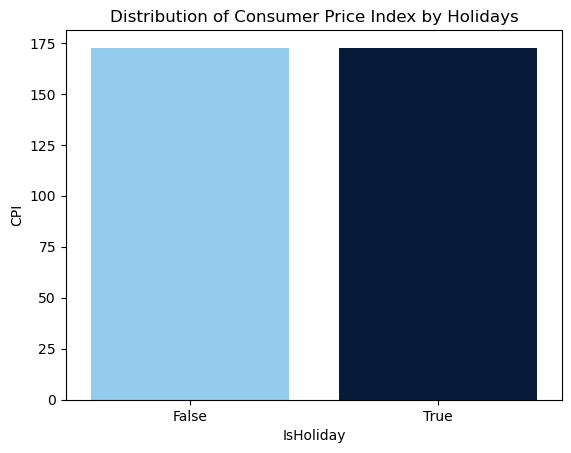

In [33]:
# Distribution of CPI by holidays
sns.barplot(x="IsHoliday",y="CPI", data=features, palette=holiday_palette, ci=None)
plt.title('Distribution of Consumer Price Index by Holidays')
plt.show()

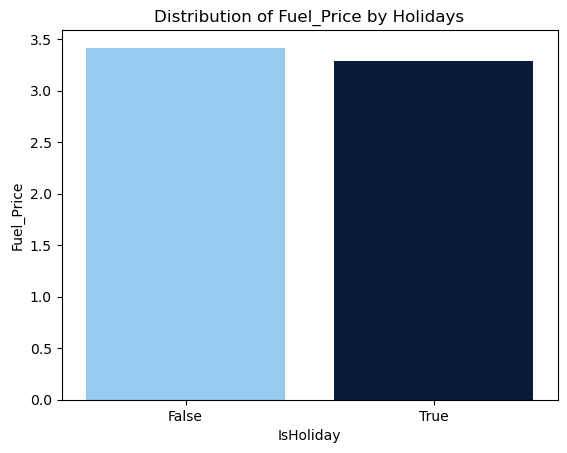

In [34]:
# Distribution of fuel price by holidays
sns.barplot(x="IsHoliday",y="Fuel_Price", data=features, palette=holiday_palette, ci=None)
plt.title('Distribution of Fuel_Price by Holidays')
plt.show()

### 2.3 Store Data EDA

In [35]:
# The first 5 rows
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [36]:
# Print the shape of the data
stores.shape

(45, 3)

In [37]:
# View the nature of data
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [38]:
# Check duplicated records:
print("Number of duplicated records before dropping:",stores.duplicated().sum())

Number of duplicated records before dropping: 0


In [39]:
# Check for missing values
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [40]:
# Descriptive Statistics for the numerical variables in the dataset (excluding the Store ID)
stores.drop(columns='Store').describe()

,Size
count,45.000000
mean,130287.600000
std,63825.271991
min,34875.000000
25%,70713.000000
50%,126512.000000
75%,202307.000000
max,219622.000000


In [41]:
# VISUALIZE OBSERVATIONS

# Group 'Type' by count of 'Store'
store_per_type = stores.groupby('Type')['Store'].nunique()

# Sort the sum of sales per store in descending order
sorted_type = store_per_type.sort_values(ascending=False)

# Reset the index to convert the result into a DataFrame
reset_sorted_types = sorted_type.reset_index()

# Rank of Store Types by number of Stores
reset_sorted_types

,Type,Store
0,A,22
1,B,17
2,C,6


In [42]:
# Top 10 Stores by Size
top_10_stores = stores.nlargest(10, 'Size')

# Add 'Rank' column
top_10_stores['Rank'] = range(1, 11)

# Reorder the columns
top_10_stores = top_10_stores[['Rank', 'Store', 'Size']]

# Reset the index and remove the original index column
top_10_stores = top_10_stores.reset_index(drop=True)

# Display the updated DataFrame
top_10_stores

,Rank,Store,Size
0,1,13,219622
1,2,11,207499
2,3,28,206302
3,4,4,205863
4,5,27,204184
5,6,19,203819
6,7,24,203819
7,8,31,203750
8,9,20,203742
9,10,32,203007


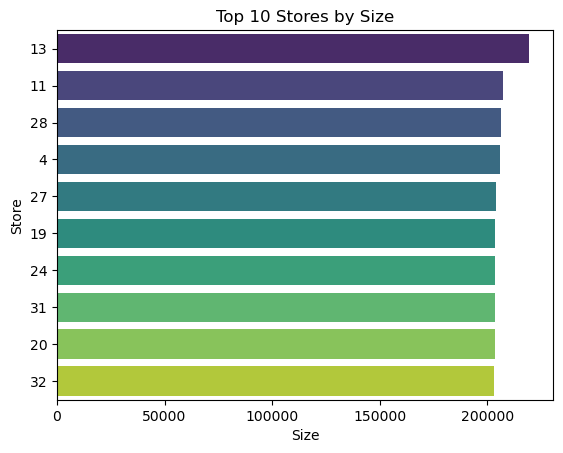

In [43]:
# Convert 'Store' column to categorical data type
top_10_stores['Store'] = top_10_stores['Store'].astype('category')

# Sort the top_10_stores DataFrame by 'Size' column in descending order
top_10_stores_sorted = top_10_stores.sort_values('Size', ascending=False)

# Create a horizontal bar chart with color-coded palette
sns.barplot(data=top_10_stores_sorted, y='Store', x='Size', order=top_10_stores_sorted['Store'], palette='viridis')
plt.title('Top 10 Stores by Size')
plt.xlabel('Size')
plt.ylabel('Store')

plt.show()

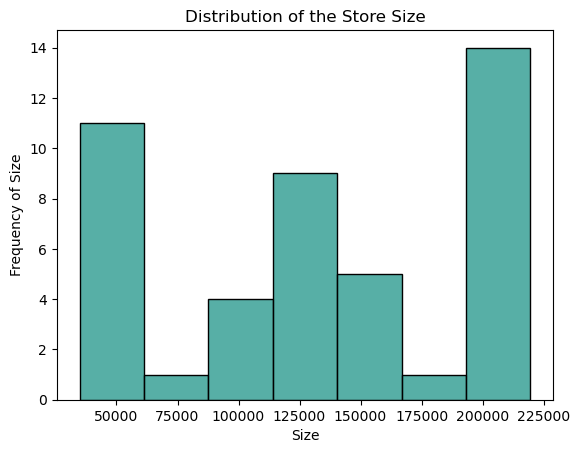

In [44]:
# Distribution of the Store Size
sns.histplot(stores['Size'], color='#1F9589')
plt.title('Distribution of the Store Size')
plt.ylabel('Frequency of Size')
plt.show()

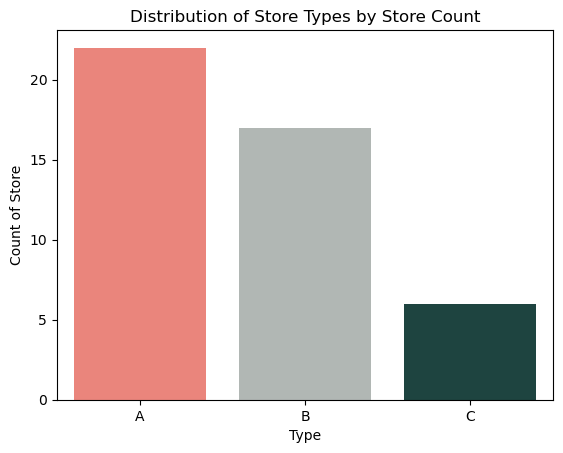

In [45]:
# Distribution of Store Types
store_type_palette = {'A': '#FC766AFF', 
                   'B': '#B0B8B4FF', 'C':'#184A45FF'}
sns.countplot(x="Type", data=stores, palette=store_type_palette)
plt.title('Distribution of Store Types by Store Count')
plt.ylabel('Count of Store')
plt.show()

### 2.4 Further Analysis on the Combined Data

In [46]:
# Combine the dataset simultaneouly 

# Merge stores dataset to the featues data first
feature_store = features.merge(stores, on="Store", how='left')

# Merge feature_store and sales tables
data = pd.merge(feature_store, sales, on=['Store', 'Date'], how='inner')

# Display the merged data
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Type,Size,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-05-02,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,A,151315,1,24924.50,False
1,1,2010-05-02,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,A,151315,2,50605.27,False
2,1,2010-05-02,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,A,151315,3,13740.12,False
3,1,2010-05-02,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,A,151315,4,39954.04,False
4,1,2010-05-02,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,A,151315,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536437,45,2011-05-20,58.85,3.882,4018.91,58.08,100.00,211.940,858.330,192.308899,8.667,False,B,118221,93,2657.18,False
536438,45,2011-05-20,58.85,3.882,4018.91,58.08,100.00,211.940,858.330,192.308899,8.667,False,B,118221,94,4227.11,False
536439,45,2011-05-20,58.85,3.882,4018.91,58.08,100.00,211.940,858.330,192.308899,8.667,False,B,118221,95,53516.00,False
536440,45,2011-05-20,58.85,3.882,4018.91,58.08,100.00,211.940,858.330,192.308899,8.667,False,B,118221,97,7117.62,False


In [47]:
# Check if the 'IsHoliday' column types from the two tables have equal values

is_holiday_equal = data['IsHoliday_x'].equals(data['IsHoliday_y'])
print(is_holiday_equal)

False


#### Note
Regardless that the 'IsHoliday_x' and 'IsHoliday_y' don't have the same values, I will keep the 'IsHoliday_y' - which is the holiday column from the sales table as it aligns more with the 'Dept' and 'Weekly_Sales' since they are majorly the alternating columns of the main data.

In [48]:
# Drop 'IsHoliday_x' column
data.drop('IsHoliday_x', axis=1, inplace=True)

In [49]:
# Check duplicated records:
print("Number of duplicated records before dropping:",data.duplicated().sum())

Number of duplicated records before dropping: 0


In [50]:
# Check out the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536442 entries, 0 to 536441
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         536442 non-null  int64         
 1   Date          536442 non-null  datetime64[ns]
 2   Temperature   536442 non-null  float64       
 3   Fuel_Price    536442 non-null  float64       
 4   MarkDown1     536442 non-null  float64       
 5   MarkDown2     536442 non-null  float64       
 6   MarkDown3     536442 non-null  float64       
 7   MarkDown4     536442 non-null  float64       
 8   MarkDown5     536442 non-null  float64       
 9   CPI           536442 non-null  float64       
 10  Unemployment  536442 non-null  float64       
 11  Type          536442 non-null  object        
 12  Size          536442 non-null  int64         
 13  Dept          536442 non-null  int64         
 14  Weekly_Sales  536442 non-null  float64       
 15  IsHoliday_y   536

In [51]:
# Check missing values
data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Dept            0
Weekly_Sales    0
IsHoliday_y     0
dtype: int64

In [52]:
# Create custom columns...

# Year column
data['Year'] = data['Date'].apply(lambda t: "CY"+str(t.year))

# Quarter column
data['Quarter'] = data['Date'].apply(lambda time: "Q"+str(time.quarter))

# Month column
data['Month'] = data['Date'].apply(lambda time: time.month_name())

# Day column
data['Day'] = data['Date'].apply(lambda time: time.day_name())

# Sales Status column
def sales_stats(value):
    if value > data['Weekly_Sales'].mean():
        return "Above Average"
    elif value == data['Weekly_Sales'].mean():
        return "Average"
    else:
        return "Below Average"

data['Sales Status']= data['Weekly_Sales'].map(sales_stats)

# Fuel Status column
def price_stats(value):
    if value > data['Fuel_Price'].mean():
        return "Above Average"
    elif value == data['Fuel_Price'].mean():
        return "Average"
    else:
        return "Below Average"

data['Fuel Status']= data['Fuel_Price'].map(price_stats)

# Tranform these columns...

# Rename colomn
data.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

# Convert Store Number to non-numerical by attaching 'S'
data['Store'] = data['Store'].apply(lambda x: "S"+str(x))

# Round up columns to 2 decimal places
columns_to_round = ['Fuel_Price', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
data[columns_to_round] = data[columns_to_round].round(2)

#showing data after transformation
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Year,Quarter,Month,Day,Sales Status,Fuel Status
0,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,1,24924.50,False,CY2010,Q2,May,Sunday,Above Average,Below Average
1,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,2,50605.27,False,CY2010,Q2,May,Sunday,Above Average,Below Average
2,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,3,13740.12,False,CY2010,Q2,May,Sunday,Below Average,Below Average
3,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,4,39954.04,False,CY2010,Q2,May,Sunday,Above Average,Below Average
4,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,5,32229.38,False,CY2010,Q2,May,Sunday,Above Average,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536437,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,93,2657.18,False,CY2011,Q2,May,Friday,Below Average,Above Average
536438,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,94,4227.11,False,CY2011,Q2,May,Friday,Below Average,Above Average
536439,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,95,53516.00,False,CY2011,Q2,May,Friday,Above Average,Above Average
536440,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,97,7117.62,False,CY2011,Q2,May,Friday,Below Average,Above Average


### 2.5 Univariate Analysis


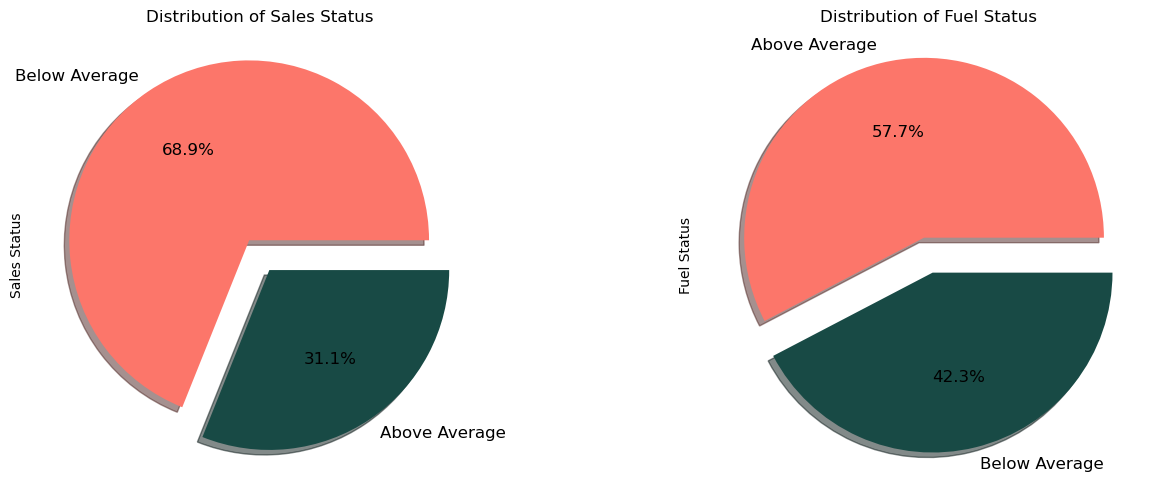

In [53]:
#Distribution of Categorical Columns
fig, axes = plt.subplots(1,2)

# Sales status
Sales= data['Sales Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=['#FC766AFF', '#184A45FF'], textprops = {'fontsize':12}, ax=axes[0])
Sales.set_title("Distribution of Sales Status")

# Fuel status
Fuel= data['Fuel Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FC766AFF', '#184A45FF'],textprops = {'fontsize':12}, ax=axes[1])
Fuel.set_title("Distribution of Fuel Status")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

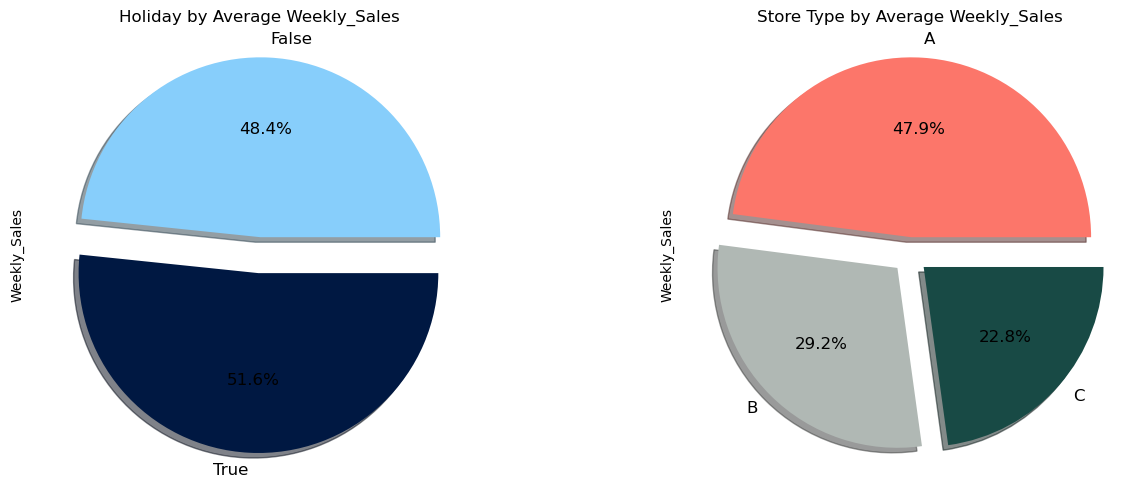

In [54]:
fig, axes = plt.subplots(1,2)

# Holiday by Average Weekly_Sales
Holiday = data.groupby('IsHoliday')['Weekly_Sales'].mean().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=['#87CEFB', '#001842'], textprops={'fontsize': 12}, ax=axes[0])
Holiday.set_title("Holiday by Average Weekly_Sales")

# Store Type by Average Weekly_Sales
Type = data.groupby('Type')['Weekly_Sales'].mean().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', shadow=True, colors=['#FC766AFF', '#B0B8B4FF', '#184A45FF'], textprops={'fontsize': 12}, ax=axes[1])
Type.set_title("Store Type by Average Weekly_Sales")

fig.set_size_inches(14, 5)
plt.tight_layout()
plt.show()

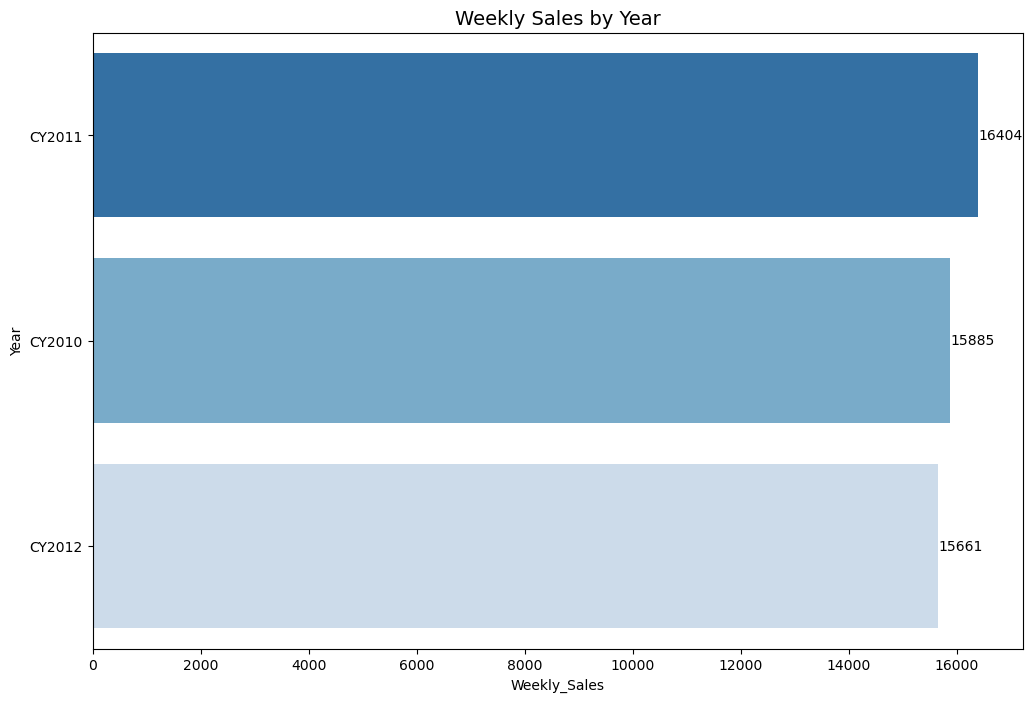

In [55]:
# Yearly Sales
plt.figure(figsize=(12, 8))

# Define a color palette
year_palette = sns.color_palette("Blues_r", len(data['Year'].unique()))  # Adjust the color palette as per your preference

year = sns.barplot(y="Year", x='Weekly_Sales', data=data, orient="h", ci=None, palette=year_palette, order=data.groupby('Year')['Weekly_Sales'].sum().sort_values(ascending=False).index)
year.set_title("Weekly Sales by Year", fontsize=14)

# Label each bar in the bar plot
for p in year.patches:
    width = p.get_width()  # width of each horizontal bar
    # Adding text to each bar
    year.text(x=width + 0.5,  # x-coordinate position of data label, padded 0.5 to the right of the bar
              y=p.get_y() + (p.get_height() / 2),  # y-coordinate position of data label, padded to be in the middle of the bar
              s='{:.0f}'.format(width),  # data label, formatted to ignore decimals
              va='center', ha='left', fontsize=10, color='black')  # set vertical alignment (va) and horizontal alignment (ha)

plt.show()

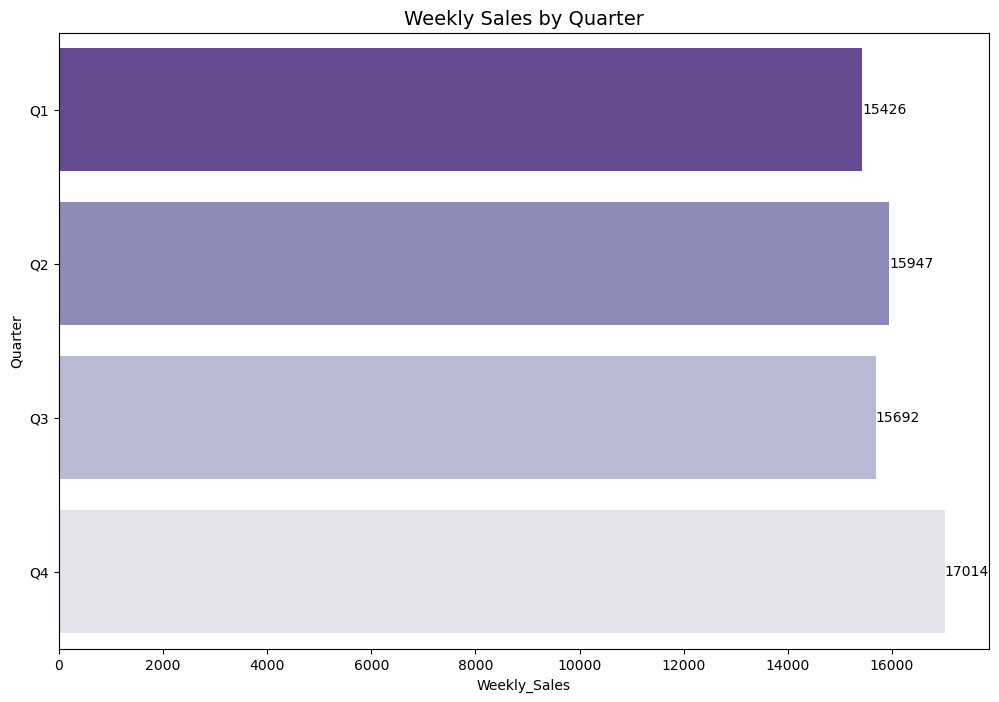

In [56]:
# Quarterly Sales
plt.figure(figsize=(12, 8))

# Define a custom order for the quarters
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Define a color palette
qtr_palette = sns.color_palette("Purples_r", len(data['Quarter'].unique()))  # Adjust the color palette as per your preference

# Convert the Quarter column to categorical with the desired order
data['Quarter'] = pd.Categorical(data['Quarter'], categories=quarter_order, ordered=True)

quarter = sns.barplot(y="Quarter", x='Weekly_Sales', data=data, orient="h", ci=None, palette=qtr_palette, order=quarter_order)
quarter.set_title("Weekly Sales by Quarter", fontsize=14)

# Label each bar in the bar plot
for p in quarter.patches:
    width = p.get_width()
    quarter.text(x=width + 0.5, y=p.get_y() + (p.get_height() / 2), s='{:.0f}'.format(width), va='center', ha='left', fontsize=10, color='black')

plt.show()

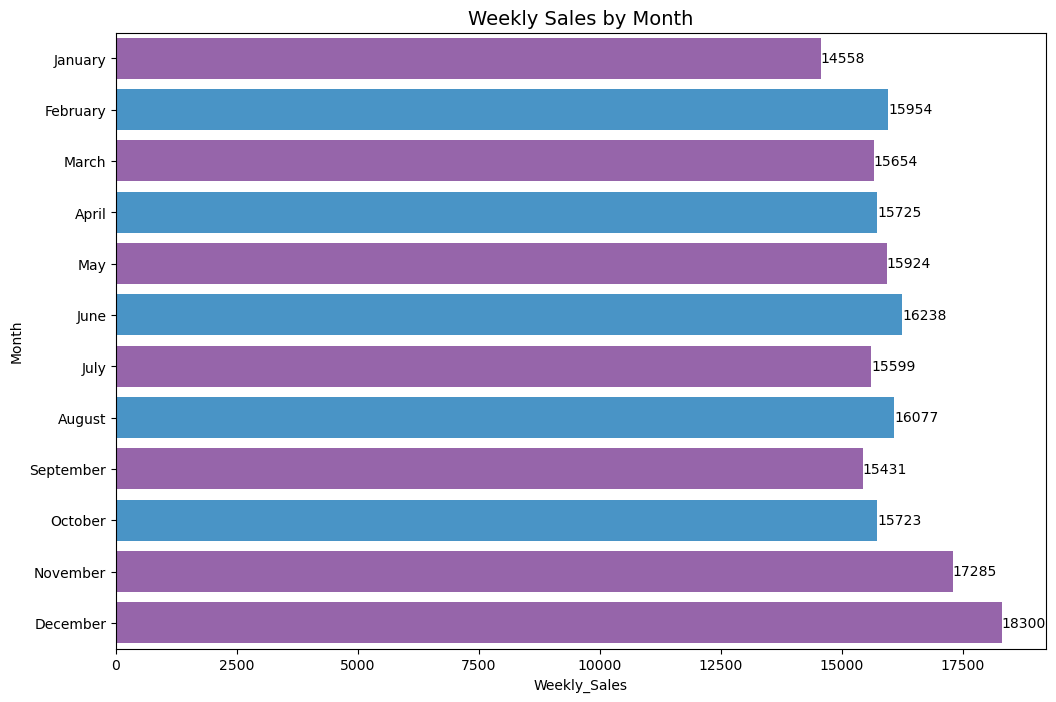

In [57]:
# Monthly Sales
plt.figure(figsize=(12, 8))

# Define a color palette
monthly_palette = sns.color_palette(["#9b59b6", "#3498db", "#9b59b6", "#3498db", "#9b59b6", "#3498db", "#9b59b6", "#3498db", "#9b59b6", "#3498db", "#9b59b6"])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

month = sns.barplot(y="Month", x='Weekly_Sales', data=data, orient="h", ci=None, palette=monthly_palette, order=month_order)
month.set_title("Weekly Sales by Month", fontsize=14)

# Label each bar in the bar plot
for p in month.patches:
    width = p.get_width()
    month.text(x=width + 0.5, y=p.get_y() + (p.get_height() / 2), s='{:.0f}'.format(width), va='center')

plt.show()


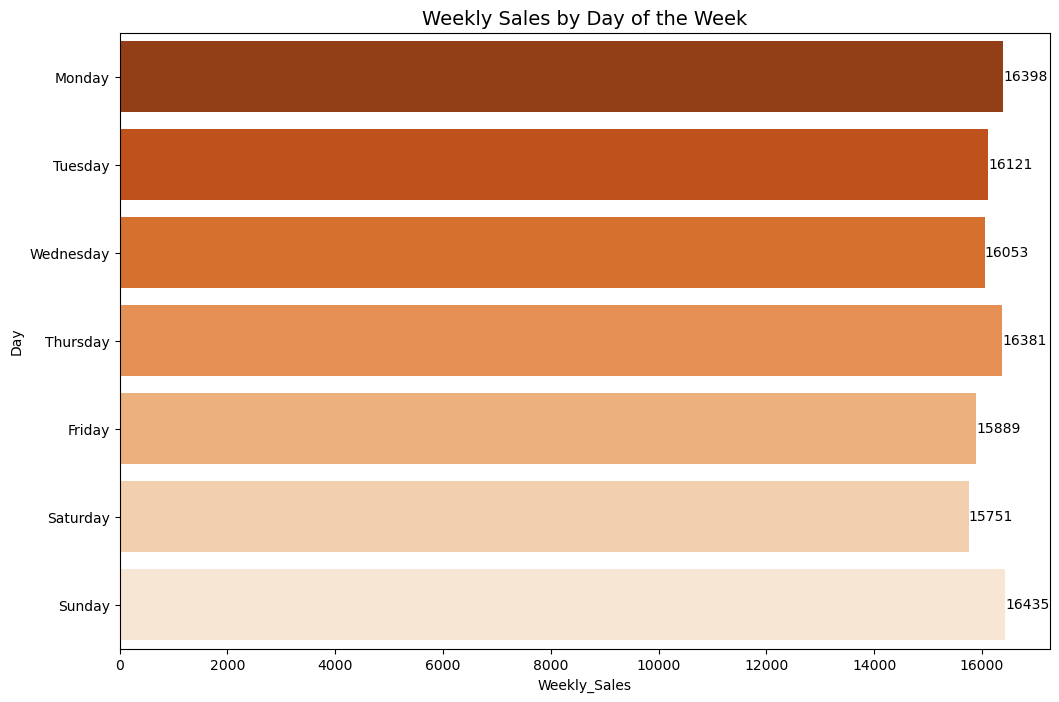

In [58]:
# Weekly Sales by Day of the Week
plt.figure(figsize=(12, 8))

# Define a color palette
weekly_palette = sns.color_palette("Oranges_r", len(data['Day'].unique()))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day = sns.barplot(y="Day", x='Weekly_Sales', data=data, orient="h", ci=None, palette=weekly_palette, order=day_order)
day.set_title("Weekly Sales by Day of the Week", fontsize=14)

# Label each bar in the bar plot
for p in day.patches:
    width = p.get_width()
    day.text(x=width + 0.5, y=p.get_y() + (p.get_height() / 2), s='{:.0f}'.format(width), va='center')

plt.show()

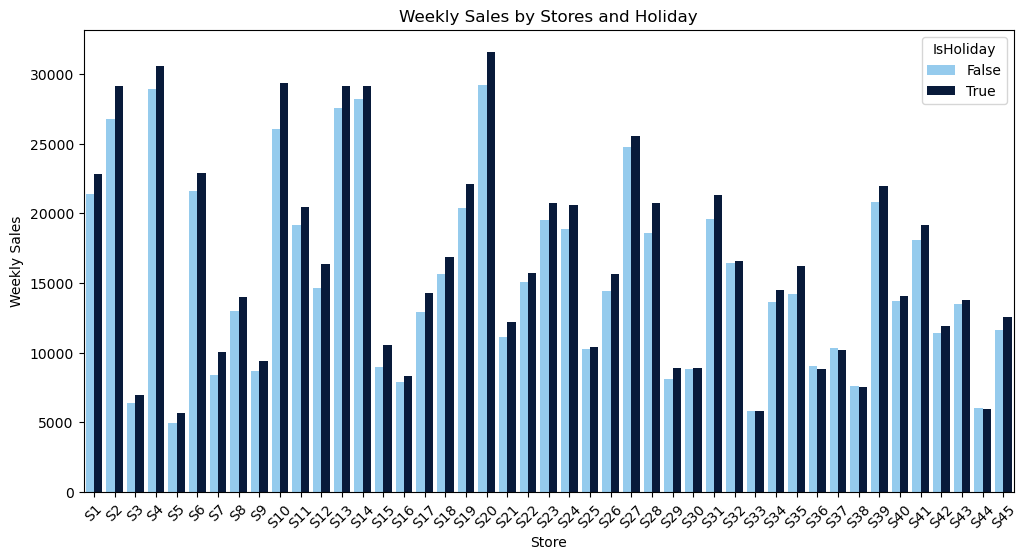

In [59]:
# Create a bar plot showing the weekly sales for each store, separated by holiday type
plt.figure(figsize=(12,6))
sns.barplot(x='Store', y='Weekly_Sales', hue='IsHoliday', data=data, palette=holiday_palette, ci=None)
plt.title('Weekly Sales by Stores and Holiday')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.tick_params(axis='x', rotation=45)

plt.show()

### 2.6 Divariate Analysis 

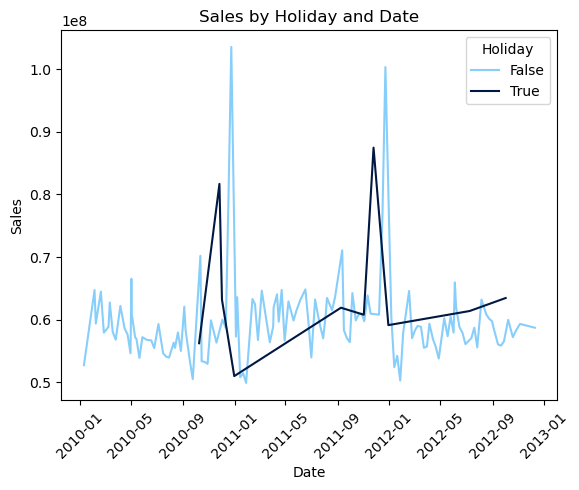

In [60]:
# Trend of Sales by Holiday

# Create a new dataframe with the sum of profit per date and company
sales_by_date = data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
sales_by_date.columns = ['Date', 'Holiday', 'Sales']

# Create the line plot
sns.lineplot(x = 'Date', y = 'Sales', data = sales_by_date, hue = 'Holiday', palette = holiday_palette)

# Set the title and axis labels
plt.title('Sales by Holiday and Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tick_params(axis='x', rotation=45)

# Show the plot
plt.show()

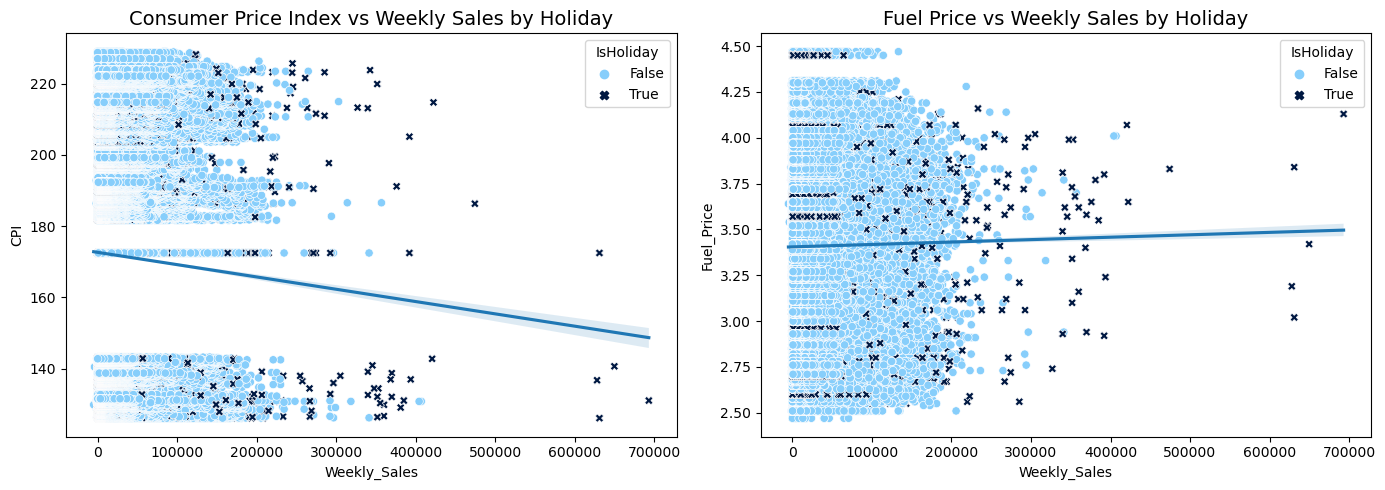

In [61]:
# CPI and Fuel Price vs Weekly Sales
fig, axes = plt.subplots(1, 2)

# Scatterplot => CPI vs Weekly_Sales with trend line
cpi_sales = sns.scatterplot(y="CPI", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette=holiday_palette, data=data, ax=axes[0])
cpi_sales.set_title("Consumer Price Index vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="CPI", x='Weekly_Sales', data=data, scatter=False, ax=axes[0]) # to add trend line

# Fuel Price vs Weekly Sales with trend line
fuel_sales = sns.scatterplot(y="Fuel_Price", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette=holiday_palette, data=data, ax=axes[1])
fuel_sales.set_title("Fuel Price vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="Fuel_Price", x='Weekly_Sales', data=data, scatter=False, ax=axes[1])

fig.set_size_inches(14, 5)
plt.tight_layout()
plt.show()


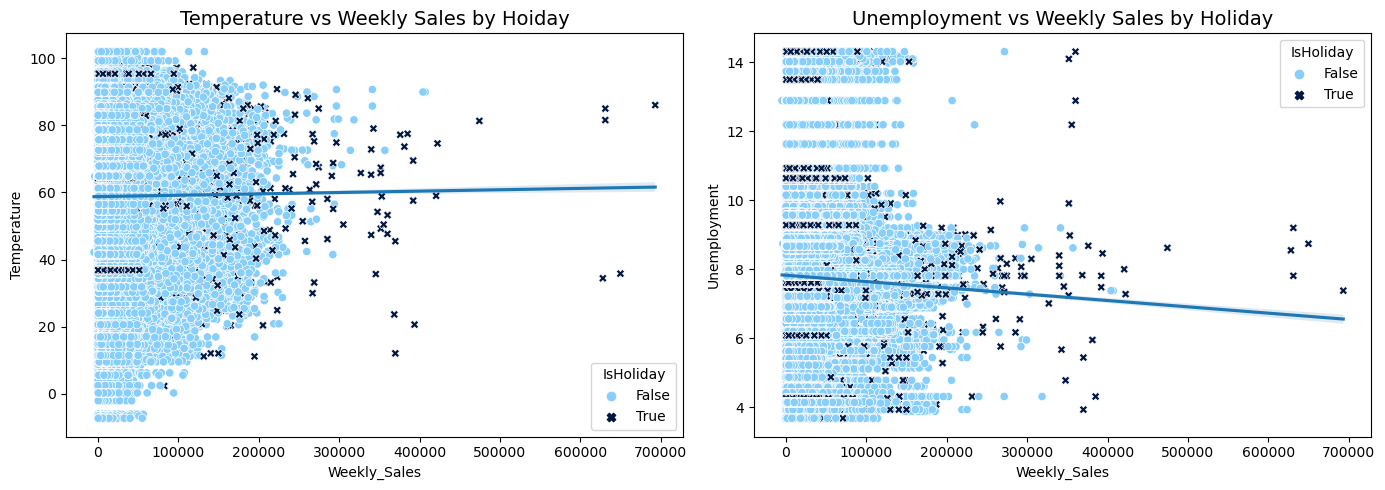

In [62]:
# Temperature and Unemployment vs Weekly Sales
fig, axes = plt.subplots(1,2)

# Temperature vs Weekly_Sales
temp_sales=sns.scatterplot(y="Temperature", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[0])
temp_sales.set_title("Temperature vs Weekly Sales by Hoiday", fontsize=14)
sns.regplot(y="Temperature", x='Weekly_Sales', data=data, scatter=False, ax=axes[0])

# Unemployment vs Weekly Sales
unemp_sales=sns.scatterplot(y="Unemployment", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[1])
unemp_sales.set_title("Unemployment vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="Unemployment", x='Weekly_Sales', data=data, scatter=False, ax=axes[1])

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

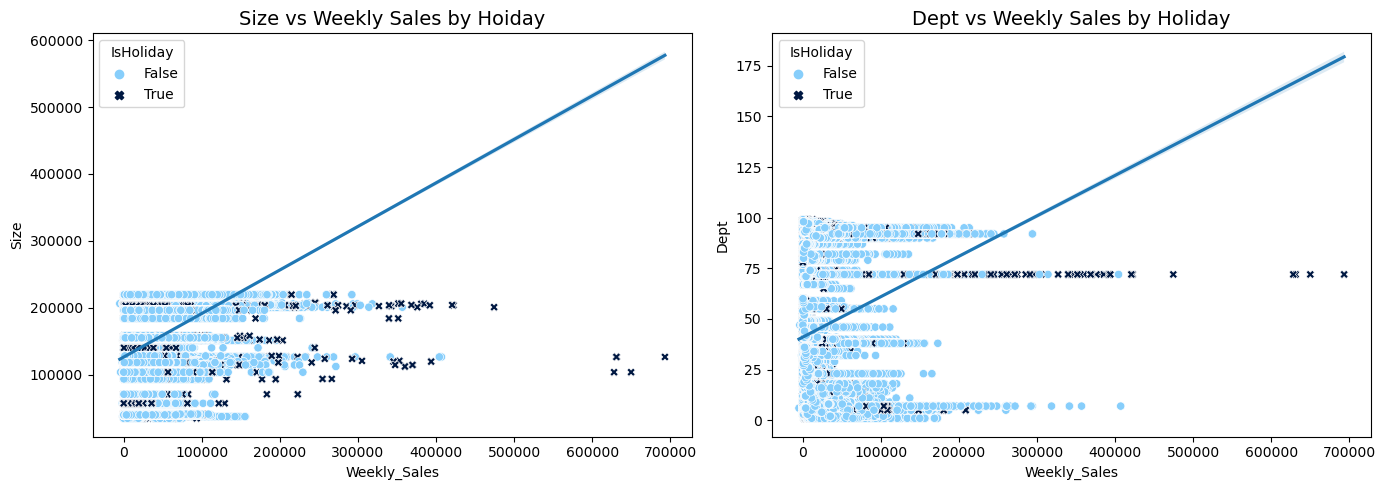

In [63]:
# Size and Dept vs Weekly Sales
fig, axes = plt.subplots(1,2)

# Size vs Weekly_Sales
size_sales=sns.scatterplot(y="Size", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[0])
size_sales.set_title("Size vs Weekly Sales by Hoiday", fontsize=14)
sns.regplot(y="Size", x='Weekly_Sales', data=data, scatter=False, ax=axes[0])

# Dept vs Weekly Sales
dept_sales=sns.scatterplot(y="Dept", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[1])
dept_sales.set_title("Dept vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="Dept", x='Weekly_Sales', data=data, scatter=False, ax=axes[1])

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

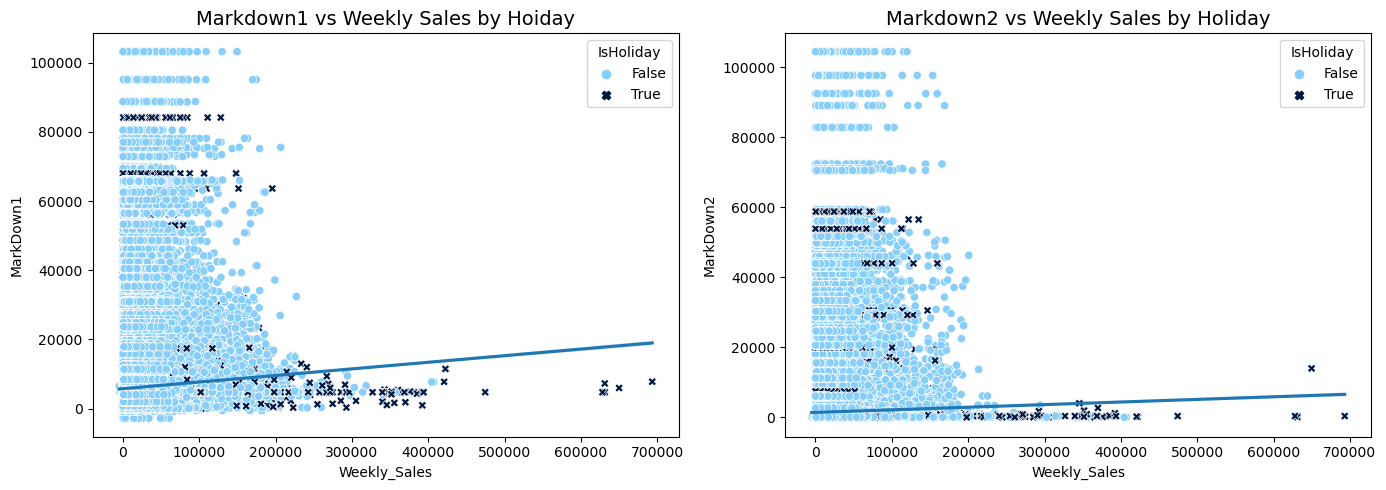

In [64]:
# Markdown1 and Markdown2 vs Weekly Sales
fig, axes = plt.subplots(1,2)

# Markdown1 vs Weekly_Sales
mark1_sales=sns.scatterplot(y="MarkDown1", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[0])
mark1_sales.set_title("Markdown1 vs Weekly Sales by Hoiday", fontsize=14)
sns.regplot(y="MarkDown1", x='Weekly_Sales', data=data, scatter=False, ax=axes[0])

# Markdown2 vs Weekly Sales
mark2_sales=sns.scatterplot(y="MarkDown2", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[1])
mark2_sales.set_title("Markdown2 vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="MarkDown2", x='Weekly_Sales', data=data, scatter=False, ax=axes[1])

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

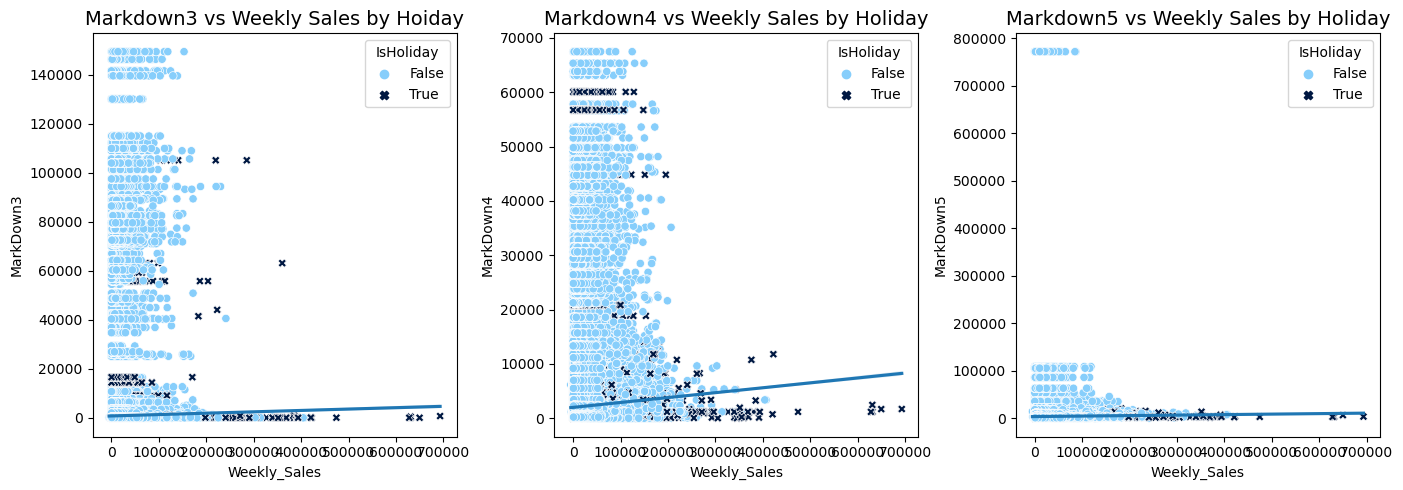

In [65]:
# Markdown3, Markdown4 and Markdown5 vs Weekly Sales
fig, axes = plt.subplots(1,3)

# Markdown3 vs Weekly_Sales
mark3_sales=sns.scatterplot(y="MarkDown3", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[0])
mark3_sales.set_title("Markdown3 vs Weekly Sales by Hoiday", fontsize=14)
sns.regplot(y="MarkDown3", x='Weekly_Sales', data=data, scatter=False, ax=axes[0])

# Markdown4 vs Weekly Sales
mark4_sales=sns.scatterplot(y="MarkDown4", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[1])
mark4_sales.set_title("Markdown4 vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="MarkDown4", x='Weekly_Sales', data=data, scatter=False, ax=axes[1])

# Markdown5 vs Weekly Sales
mark5_sales=sns.scatterplot(y="MarkDown5", x='Weekly_Sales', hue="IsHoliday", style='IsHoliday', palette = holiday_palette, data=data,ax=axes[2])
mark5_sales.set_title("Markdown5 vs Weekly Sales by Holiday", fontsize=14)
sns.regplot(y="MarkDown5", x='Weekly_Sales', data=data, scatter=False, ax=axes[2])

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

## 3.0 Feature Selection and Data Preprocessing

In [66]:
# Import Libraries
from sklearn.preprocessing import StandardScaler # to avoid the effects of the outliers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from imblearn.over_sampling import SMOTE

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, precision_recall_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [67]:
# label encoding
def to_encoding(self):
    # Fuel Status
    fuel = {'Above Average' : 1,
                 'Average': 0,
                 'Below Average' : 0}

    self['Fuel Status'] = self['Fuel Status'].map(fuel)

    # Sales Status
    sales = {'Above Average' : 1,
                 'Average': 0,
                 'Below Average' : 0}

    self['Sales Status'] = self['Sales Status'].map(sales)

    # Holiday Status
    holiday = {True : 1,
                 False : 0}

    self['IsHoliday'] = self['IsHoliday'].map(holiday)
    
     # Day of the week
    dayOfWeek = {'Monday':'Early_Weekday',
                 'Tuesday':'Early_Weekday',
                 'Wednesday':'Mid_Weekday',
                 'Thursday':'Mid_Weekday',
                  'Friday':'Last_Weekday',
                  'Saturday':'Weekend',
                  'Sunday':'Weekend'}            
                
    self['Day'] = self['Day'].map(dayOfWeek)
    
    return self

to_encoding(data)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Dept,Weekly_Sales,IsHoliday,Year,Quarter,Month,Day,Sales Status,Fuel Status
0,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,1,24924.50,0,CY2010,Q2,May,Weekend,1,0
1,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,2,50605.27,0,CY2010,Q2,May,Weekend,1,0
2,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,3,13740.12,0,CY2010,Q2,May,Weekend,0,0
3,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,4,39954.04,0,CY2010,Q2,May,Weekend,1,0
4,S1,2010-05-02,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,A,151315,5,32229.38,0,CY2010,Q2,May,Weekend,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536437,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,93,2657.18,0,CY2011,Q2,May,Last_Weekday,0,1
536438,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,94,4227.11,0,CY2011,Q2,May,Last_Weekday,0,1
536439,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,95,53516.00,0,CY2011,Q2,May,Last_Weekday,1,1
536440,S45,2011-05-20,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,97,7117.62,0,CY2011,Q2,May,Last_Weekday,0,1


In [68]:
# covert to dummy features
def hot_encoding(self):
    
    # Setting the dummy features (one-hot encoding) to enhance feature selection
    df = pd.get_dummies(self, columns=['Type', 'Year', 'Quarter',"Day"])
    
    # Drop unwanted colunms
    df.drop(columns = ['Store', 'Date', 'Month'], inplace=True)
                                         
    return df

df1 = hot_encoding(data)
df1

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales,IsHoliday,Sales Status,Fuel Status,Type_A,Type_B,Type_C,Year_CY2010,Year_CY2011,Year_CY2012,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Day_Early_Weekday,Day_Last_Weekday,Day_Mid_Weekday,Day_Weekend
0,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,151315,1,24924.50,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,151315,2,50605.27,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
2,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,151315,3,13740.12,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
3,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,151315,4,39954.04,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,42.31,2.57,4743.58,364.57,36.26,1176.42,2727.14,211.10,8.11,151315,5,32229.38,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536437,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,118221,93,2657.18,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
536438,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,118221,94,4227.11,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
536439,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,118221,95,53516.00,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
536440,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,118221,97,7117.62,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0


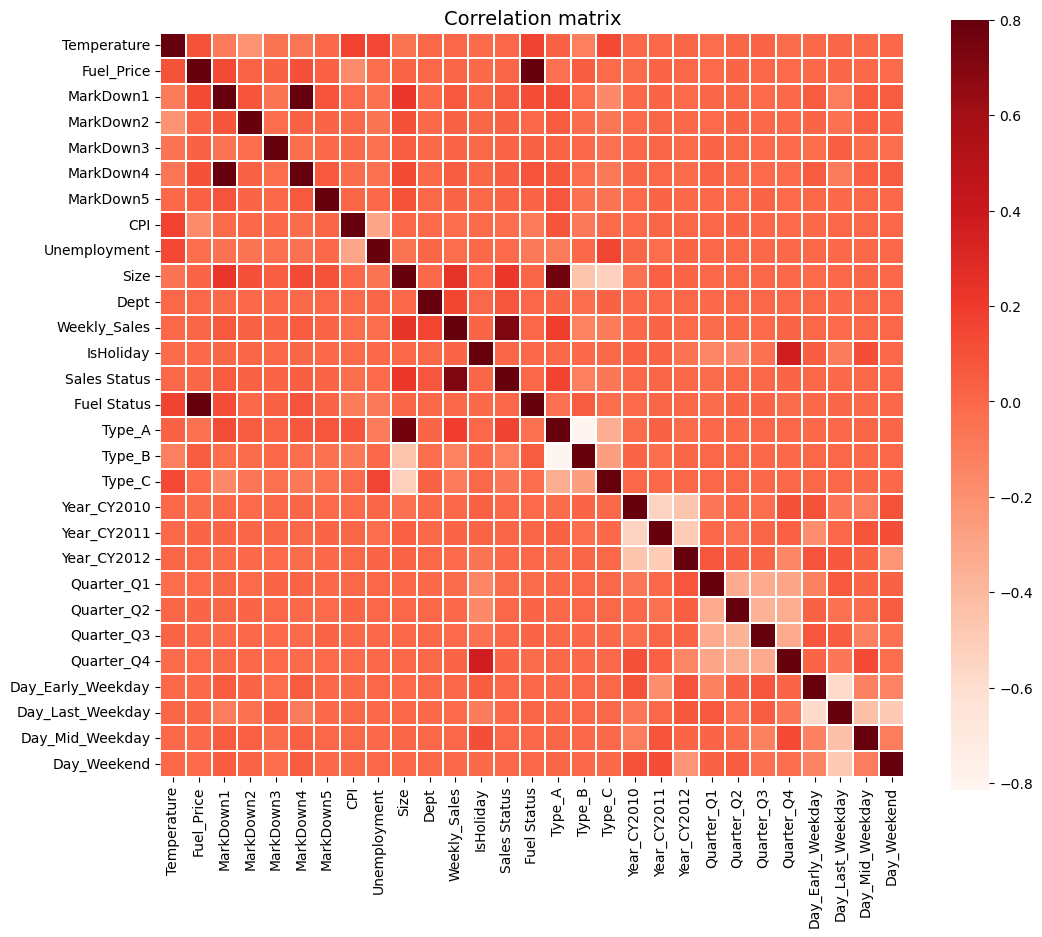

In [69]:
# Correlation Analysis
def corr_mat(self):
    colormap = plt.cm.Reds
    plt.figure(figsize=(12,10))
    sns.heatmap(self.corr(),linewidths=0.1,vmax=0.8, 
                square=True, cmap = colormap, linecolor='white')
    plt.title('Correlation matrix', fontsize=14)
    plt.show()
    
corr_mat(df1)

In [70]:
# Feature Variable (X) and Target Variable (y) 

X = df1.drop('Weekly_Sales', axis=1) # select all columns except 'Weekly_Sales'
y = df1['Weekly_Sales'] # select only the 'Weekly_Sales' column

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply data preprocessing by scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Dept', 'IsHoliday', 'Sales Status', 'Type_A',
       'Type_B', 'Type_C', 'Quarter_Q4'],
      dtype='object')


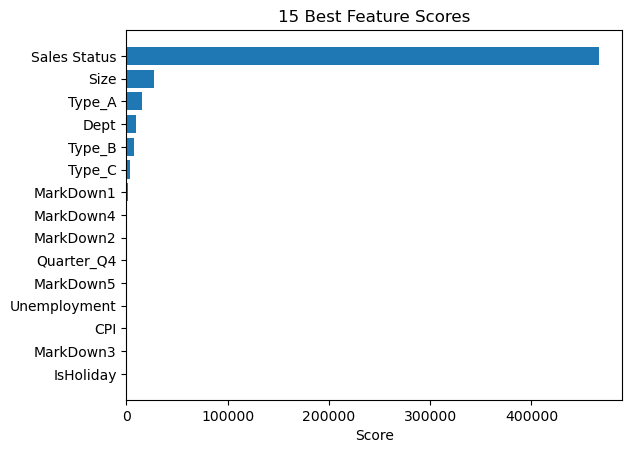

In [72]:
# create a SelectKBest object with k features
kbest = SelectKBest(score_func=f_regression, k=15)

# fit and transform the scaled training data
X_train_selected = kbest.fit_transform(X_train_scaled, y_train)

# Transform the scaled testing data using the selected features
X_test_selected = kbest.transform(X_test_scaled)

# get the indices of the selected features
selected_features_indices = kbest.get_support(indices=True)

# get the names of the selected features
selected_features = X.columns[selected_features_indices]

# print the selected features
print(selected_features)

# create a bar chart of feature scores in ascending order
fig, ax = plt.subplots()
sorted_indices = np.argsort(kbest.scores_[selected_features_indices])
sorted_features = selected_features[sorted_indices]
sorted_scores = kbest.scores_[selected_features_indices][sorted_indices]
ax.barh(sorted_features, sorted_scores)
ax.set_xlabel('Score')
ax.set_title('15 Best Feature Scores')
plt.show()

## 4.0 Modeling Department-Wide Sales

,Model,MSE,MAE,RMSE,R-squared,Adjusted R-squared,Cross-validated Score
0,LinearRegression,2.363640e+08,8682.743255,15374.135280,0.539671,0.539655,0.538108
1,DecisionTreeRegressor,6.076167e+07,2474.276552,7794.977450,0.881664,0.881660,0.867681
2,RandomForestRegressor,3.393486e+07,1995.999450,5825.363327,0.933910,0.933908,0.923268
3,GradientBoostingRegressor,8.131474e+07,4898.450961,9017.468828,0.841636,0.841631,0.834232
4,XGBRegressor,3.449620e+07,2665.613717,5873.346782,0.932817,0.932815,0.923578


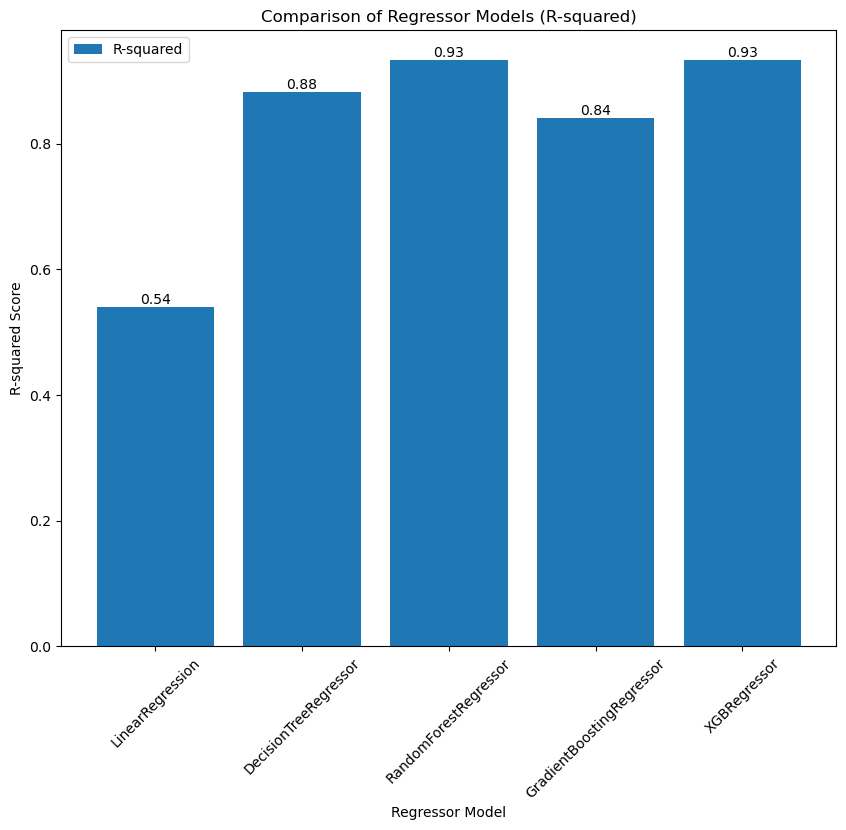

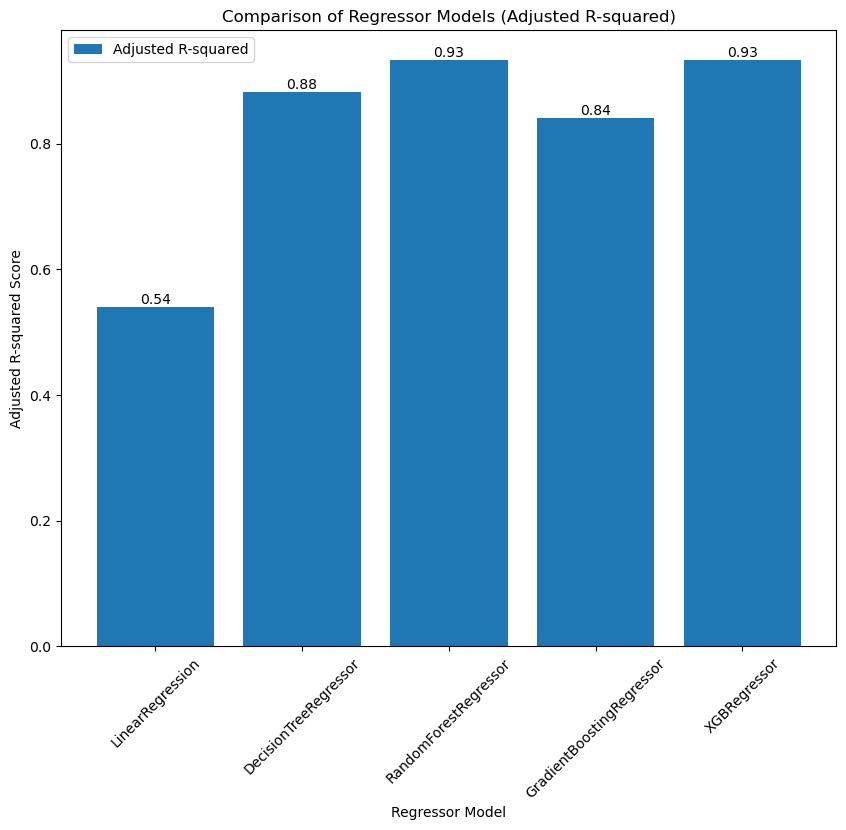

In [73]:
# # Define the hyperparameter grid for each model
# param_grid = {
#     'GradientBoostingRegressor': {'n_estimators': [100, 200, 300]},
#     'XGBRegressor': {'n_estimators': [100, 200, 300]}
# }

# # Perform grid search for each model
# best_params = {}
# for model_name, model in [('GradientBoostingRegressor', GradientBoostingRegressor), ('XGBRegressor', XGBRegressor)]:
#     grid_search = GridSearchCV(model(), param_grid[model_name], scoring='neg_mean_squared_error', cv=5)
#     grid_search.fit(X_train_selected, y_train)
#     best_params[model_name] = grid_search.best_params_

# # Print the best hyperparameters for each model
# for model_name, params in best_params.items():
#     print(f"Best hyperparameters for {model_name}: {params}")



# Modeling - Department-Wide Sales
def compare_regressor_models(models, X_train, y_train, X_test, y_test):
    mse_scores = []
    mae_scores = []
    rmse_scores = []
    r2_scores = []
    adjusted_r2_scores = []
    cv_scores = []

    for model in models:
        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Calculate adjusted R-squared
        n = X_train.shape[0]
        p = X_train.shape[1]
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        # Calculate cross-validated scores
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

        # Append scores to respective lists
        mse_scores.append(mse)
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        adjusted_r2_scores.append(adjusted_r2)
        cv_scores.append(cv_score)

    # Create a dictionary to store the evaluation metric scores
    model_names = [type(model).__name__ for model in models]
    
    scores = {
        'Model': model_names,
        'MSE': mse_scores,
        'MAE': mae_scores,
        'RMSE': rmse_scores,
        'R-squared': r2_scores,
        'Adjusted R-squared': adjusted_r2_scores,
        'Cross-validated Score': cv_scores
    }

    # Create a dataframe from the scores dictionary
    scores_df = pd.DataFrame(scores)

    # Display the dataframe
    display(scores_df)
    
    # Plotting R-squared evaluation metric
    plt.figure(figsize=(10, 8))
    bars = plt.bar(model_names, r2_scores, label='R-squared')

    # Add labels to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    plt.xlabel('Regressor Model')
    plt.ylabel('R-squared Score')
    plt.title('Comparison of Regressor Models (R-squared)')
    plt.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.show()

    # Plotting Adjusted R-squared evaluation metric
    plt.figure(figsize=(10, 8))
    bars = plt.bar(model_names, adjusted_r2_scores, label='Adjusted R-squared')

    # Add labels to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    plt.xlabel('Regressor Model')
    plt.ylabel('Adjusted R-squared Score')
    plt.title('Comparison of Regressor Models (Adjusted R-squared)')
    plt.tick_params(axis='x', rotation=45)
    plt.legend()
    plt.show()

    
# Create regressor models
linear_regression = LinearRegression(normalize=True)
decision_tree = DecisionTreeRegressor(max_depth=None)
random_forest = RandomForestRegressor(n_estimators=200)
gradient_boosting = GradientBoostingRegressor(n_estimators=300)
xgb_regressor = XGBRegressor(n_estimators=300)

# List of models
models = [linear_regression, decision_tree, random_forest, gradient_boosting, xgb_regressor]

# Call the function to compare the models
compare_regressor_models(models, X_train_selected, y_train, X_test_selected, y_test)


## 5.0 Modeling Effects of Markdowns on Holiday Weeks

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5094
           1       0.31      0.00      0.01      2502

    accuracy                           0.67      7596
   macro avg       0.49      0.50      0.40      7596
weighted avg       0.55      0.67      0.54      7596

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80      5094
           1       0.51      0.06      0.11      2502

    accuracy                           0.67      7596
   macro avg       0.59      0.52      0.45      7596
weighted avg       0.62      0.67      0.57      7596

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      5094
           1       0.50      0.01      0.01      2502

    accuracy                    

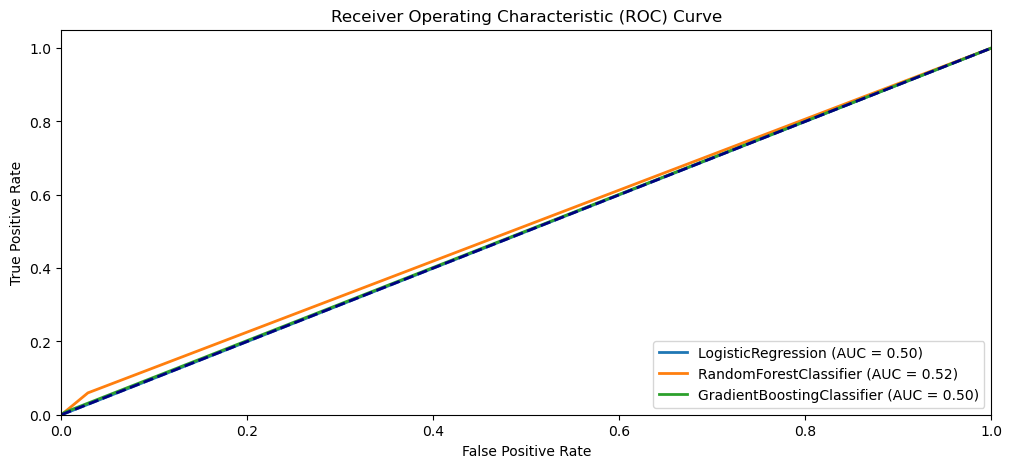

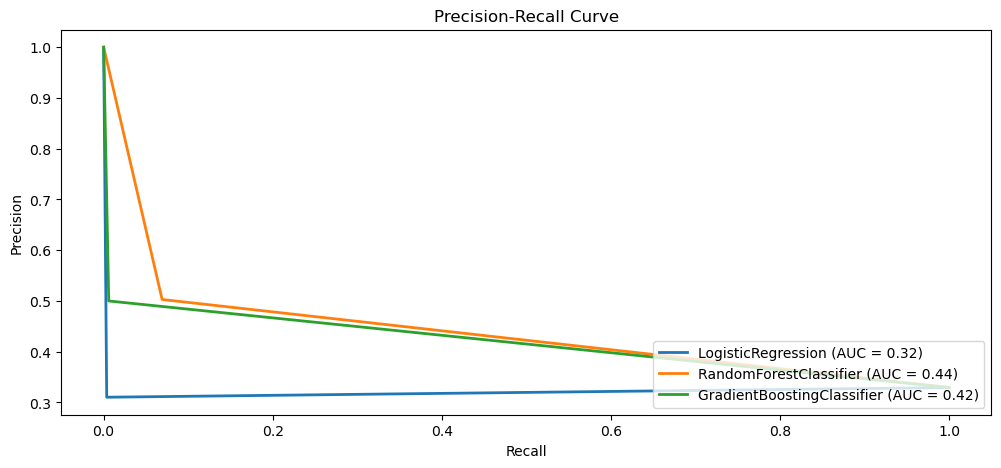

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.669168,0.310345,0.003597,0.007112
1,RandomForestClassifier,0.671143,0.506803,0.059552,0.106581
2,GradientBoostingClassifier,0.670616,0.500000,0.005995,0.011848


In [74]:
def get_param_grid(model):
    if isinstance(model, LogisticRegression):
        return {'C': [0.1, 1, 10]}
    elif isinstance(model, RandomForestClassifier):
        return {'n_estimators': [100, 200, 300]}
    elif isinstance(model, GradientBoostingClassifier):
        return {'n_estimators': [100, 200, 300]}
    else:
        return {}

def compare_classifier_models(models, X_train, y_train, X_test, y_test):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    plt.figure(figsize=(12, 5))

    for model in models:
        # Perform grid search for the current model
        param_grid = get_param_grid(model)
        grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Make predictions on the validation set
        y_pred = best_model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append scores to respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Generate classification report
        report = classification_report(y_test, y_pred)
        print(f"Classification Report for {type(best_model).__name__}:")
        print(report)

        # Generate ROC curve and calculate AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{type(best_model).__name__} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall curves
    plt.figure(figsize=(12, 5))

    for model in models:
        # Perform grid search for the current model
        param_grid = get_param_grid(model)
        grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Make predictions on the validation set
        y_pred = best_model.predict(X_test)

        # Generate precision-recall curve and calculate AUC
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        pr_auc = auc(recall, precision)

        # Plot precision-recall curve
        plt.plot(recall, precision, lw=2, label=f'{type(best_model).__name__} (AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Create a dictionary to store the evaluation metric scores
    model_names = [type(model).__name__ for model in models]

    scores = {
        'Model': model_names,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1-Score': f1_scores
    }

    # Create a dataframe from the scores dictionary
    scores_df = pd.DataFrame(scores)

    # Display the dataframe
    display(scores_df)


# Step 1: Subset the data for holiday weeks
holiday_data = df1[df1['IsHoliday'] == 1]  

# Step 2: Data Preparation
# Select markdown columns as features
markdown_features = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Subset the data with markdown features
selected_data = holiday_data[markdown_features]

# Subset the target variable to binary labels => based on sales above average = 1, else 0
labels = holiday_data['Sales Status']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(selected_data, labels, test_size=0.2, random_state=42)

# Scale the features using StandardScaler to avoid the effects of outliers
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Step 3: Modeling - Effects of Markdowns on Holiday Weeks
# Define the models
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Call the function to compare the models
compare_classifier_models(models, X_train_scaled, y_train, X_valid_scaled, y_valid)


#### Note
It's essential to evaluate the importance and relevance of the markdown features in predicting the target variable (sales during holiday weeks). If the markdown features do not have a strong relationship with sales or do not provide meaningful information for the classification task, the models may struggle to achieve high performance. And this is what might have occured here.

However, if the classes (sales above average and sales below average) are imbalanced, with one class being dominant, it can affect the model's ability to learn and generalize effectively. Techniques such as resampling methods (oversampling, undersampling) or using class weights can help address this issue.

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      5094
           1       0.39      0.31      0.34      2502

    accuracy                           0.62      7596
   macro avg       0.54      0.54      0.54      7596
weighted avg       0.59      0.62      0.60      7596

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.78      0.28      0.41      5094
           1       0.36      0.84      0.51      2502

    accuracy                           0.46      7596
   macro avg       0.57      0.56      0.46      7596
weighted avg       0.64      0.46      0.44      7596

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.78      0.27      0.41      5094
           1       0.36      0.84      0.51      2502

    accuracy                    

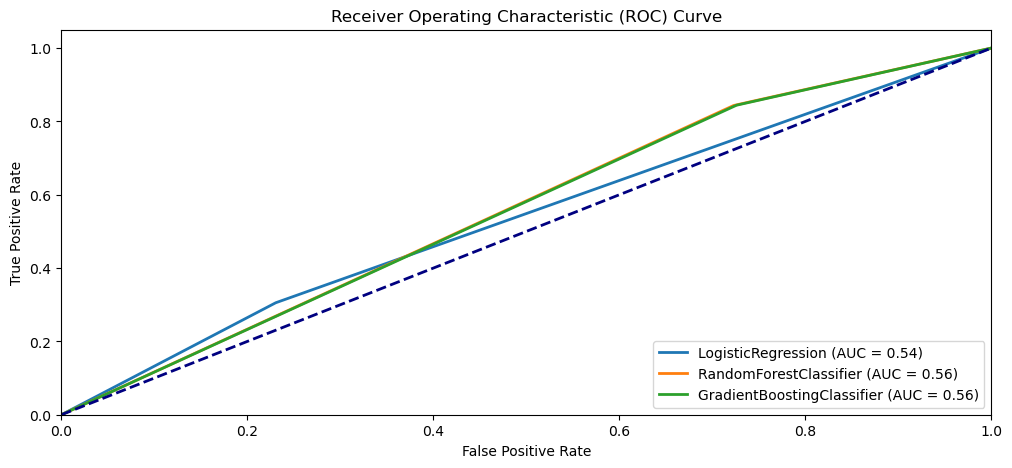

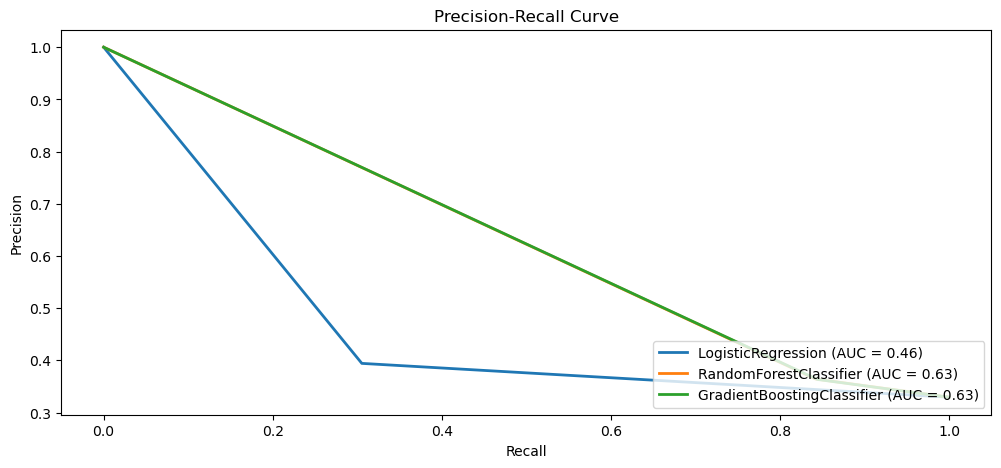

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.616640,0.394221,0.305356,0.344144
1,RandomForestClassifier,0.463665,0.364296,0.843325,0.508802
2,GradientBoostingClassifier,0.461822,0.363511,0.844125,0.508181


In [75]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Call the function to compare the models
compare_classifier_models(models, X_train_resampled, y_train_resampled, X_valid_scaled, y_valid)

#### Note:
At this point it may be necessary to perform additional feature engineering to capture more relevant information related to sales during holiday weeks. Remember we didn't do feature selection as it relates to the target variable, but limited ourselves to the markdown features. This could involve exploring other features or creating new features that better capture the underlying patterns and dynamics of sales during holidays.

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5094
           1       1.00      1.00      1.00      2502

    accuracy                           1.00      7596
   macro avg       1.00      1.00      1.00      7596
weighted avg       1.00      1.00      1.00      7596

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5094
           1       1.00      1.00      1.00      2502

    accuracy                           1.00      7596
   macro avg       1.00      1.00      1.00      7596
weighted avg       1.00      1.00      1.00      7596

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5094
           1       1.00      1.00      1.00      2502

    accuracy                    

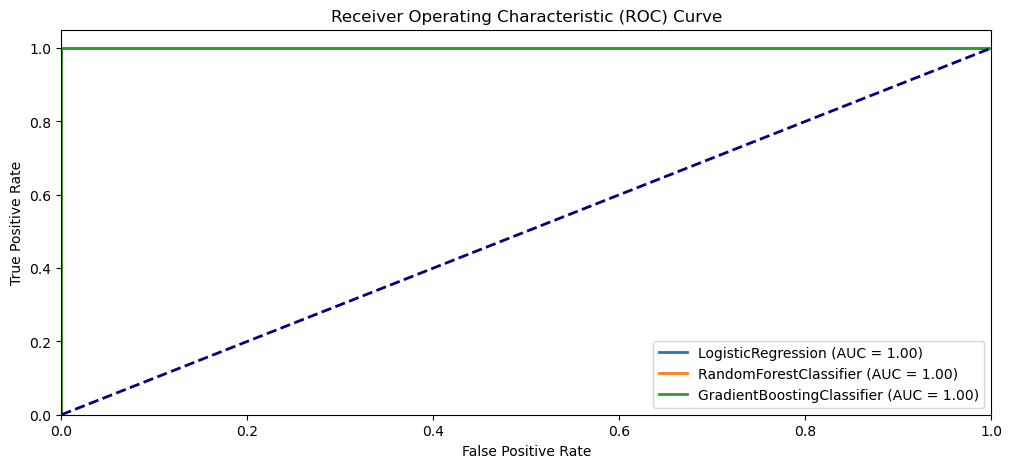

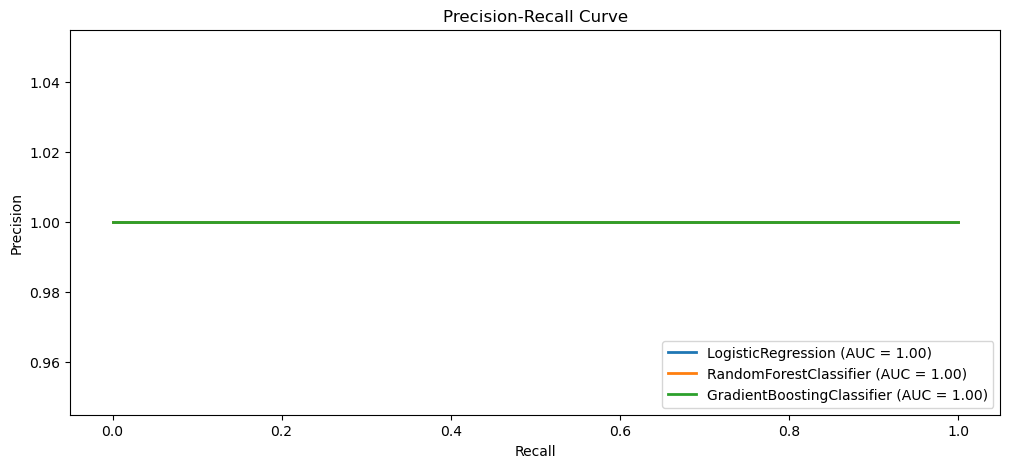

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,1.0,1.0,1.0,1.0
1,RandomForestClassifier,1.0,1.0,1.0,1.0
2,GradientBoostingClassifier,1.0,1.0,1.0,1.0


In [76]:
# Step 1 Data Preparation
# Subset the data without the markdown features
selected_data = holiday_data.drop(markdown_features, axis=1)

# Subset the target variable to binary labels based on sales above average = 1, else 0
labels = holiday_data['Sales Status']

# Step 2 Feature Selection using SelectKBest
# Use SelectKBest to select the top 10 features based on f_classif score
k = 10 # number of best features needed
selector = SelectKBest(f_classif, k=k)
selected_features = selector.fit_transform(selected_data, labels)

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_data.columns[feature_indices]

# Step 3: Combine the selected features with the markdown features
final_features = list(selected_feature_names) + markdown_features

# Subset the data with the final selected features
selected_data = holiday_data[final_features]

# Step 4: Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(selected_data, labels, test_size=0.2, random_state=42)

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Step 7: Train and evaluate the model as before, using the updated feature set and target variable
# Call the function to compare the models
compare_classifier_models(models, X_train_scaled, y_train, X_valid_scaled, y_valid)


## Recommendation

These insights aim to drive revenue growth, enhance decision-making, and maximize business profitability.

1. Focus on Effective Sales Forecasting Models:
   - Our analysis suggests that the Random Forest and XGBoost models have demonstrated superior performance in sales forecasting. We recommend prioritizing these models to predict sales accurately and guide decision-making processes.

2. Identify Key Influential Factors:
   - Conduct an in-depth analysis of feature importance derived from the Random Forest and XGBoost models. This analysis will uncover the critical factors that significantly influence sales performance.
   - Use this knowledge to inform strategic decision-making and prioritize actions that align with these influential factors.

3. Expand Feature Set:
   - While the impact of markdown features alone may be limited, we recommend exploring additional features that contribute significantly to sales performance.
   - Utilize feature selection techniques such as SelectKBest to identify the top features that have the most significant influence on sales.
   - Incorporate these features into the existing set to enhance the accuracy and predictive power of the models.

4. Leverage Seasonality:
   - Leverage the observed seasonality patterns in sales data, with particular emphasis on holiday weeks, especially in November and December.
   - Devise targeted marketing campaigns, promotions, and discounts tailored to capture increased customer demand during these peak periods.
   - Optimize inventory management, staffing levels, and operational strategies to align with the expected surge in sales.

5. Optimize Sales by Day of Week:
   - Analyze sales patterns by day of the week to identify the best and worst performing days.
   - Adjust marketing efforts, staffing, and inventory levels based on these insights.
   - Focus on maximizing sales on the best performing days like Sundays and Mondays while implementing strategies to improve performance on the least favorable days. Eg. Friday

6. Capitalize on Successful Store Types:
   - Identify the success factors driving sales in Store Types A and B, which have demonstrated significant contributions to overall sales performance.
   - Extract key strategies employed by these store types and consider implementing similar approaches in other store types to drive sales growth across the board.

7. Monitor and Evaluate Performance:
   - Establish a regular performance monitoring framework to track sales performance, markdown effectiveness, and the impact of implemented strategies.
   - Continuously evaluate the models' performance, considering retraining with updated data to ensure accurate sales predictions and optimal decision-making.

8. Customer Segmentation:
   - Explore customer segmentation strategies to gain deeper insights into customer preferences and behaviors.
   - Utilize these insights to tailor marketing campaigns, promotions, and product offerings to specific customer segments, enhancing customer satisfaction and driving sales growth.

9. Foster Collaboration:
   - Encourage close collaboration between the marketing and operations teams.
   - Share insights and findings from the analysis to inform marketing campaigns, inventory management, and operational decisions.
   - Foster a cohesive approach to drive sales growth and maximize the effectiveness of strategies implemented.

By implementing these recommendations, we anticipate improvements in sales performance, optimization of markdown strategies, and enhanced leveraging of holiday weeks. We advise a regular review and adaptation of these strategies to align with evolving market dynamics, customer behavior, and overall business objectives.

We are confident that these recommendations will provide the necessary guidance to propel sales growth, increase revenue, and optimize business performance. 